<a href="https://colab.research.google.com/github/rzunick/MNA-Proyecto-Integrador-Equipo-43/blob/main/Avance_2_Equipo_43_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Portada
Instituto Tecnológico de Estudios Superiores de Monterrey

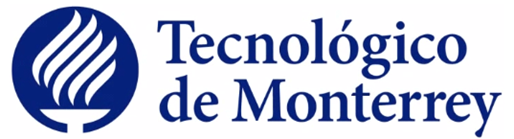

Maestría en Inteligencia Artificial Aplicada (MNA)
Curso: TC5035 Proyecto Integrador

Profesores: Dra. Grettel Barceló Alonso y Dr. Luis Eduardo Falcón

Proyecto: Reconocimiento y Clasificación de Objetos basado en Colores para Detección en Vivo en Cámaras de Seguridad
##Avance 2. Ingenieria de Características


Equipo 43
* Ronald David Zuniga Sanchez - A01686240

#1 - Introducción

En el presente avance del Proyecto Integrador **Reconocimiento y Clasificación de Objetos basado en Colores para Detección en Vivo en Cámaras de Seguridad**, se desarrollan técnicas de ingeniería de características (Feature engineering) para preparar el conjunto de datos para el proceso de desarrollo y entrenamiento del modelo.

Se desarrolla la creación de la característica de color dominante o color principal del objeto segmentado con el objetivo de crear una nueva etiqueta/label/feature en el dataset que funcione como característica principal.

#2 - Importando el Dataset

##Instalación de dependencias

In [1]:
# Instalar aplicación y libreriás de Fifty One para la importación y análisis del dataset.
!pip install fiftyone

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.0/670.0 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 kB 7.4 MB/s eta 0:00:00
  Installing build dependenc

**Instalación de libreria SciKit Learn en fiftyone**

In [2]:
!pip install -U scikit-learn fiftyone

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 90.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [3]:
# Carga de aplicación y herramienta de importación de datasets de Fifty One.
import fiftyone as fo
import fiftyone.brain as fob
import fiftyone.zoo as foz
from fiftyone import ViewField as F

# Use the `torch` backend
fo.config.default_ml_backend = "torch"

Migrating database to v0.23.8


INFO:fiftyone.migrations.runner:Migrating database to v0.23.8


In [4]:
# Load a subset of the COCO dataset
dataset_color_train = foz.load_zoo_dataset("cifar10", split="train")

INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/cifar10/train'


100%|██████████| 170498071/170498071 [00:10<00:00, 15775579.45it/s]


Extracting /root/fiftyone/cifar10/tmp-download/cifar-10-python.tar.gz to /root/fiftyone/cifar10/tmp-download
 100% |█████████████| 50000/50000 [22.4s elapsed, 0s remaining, 2.2K samples/s]      


INFO:eta.core.utils: 100% |█████████████| 50000/50000 [22.4s elapsed, 0s remaining, 2.2K samples/s]      


Dataset info written to '/root/fiftyone/cifar10/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/cifar10/info.json'


Loading 'cifar10' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'cifar10' split 'train'


 100% |█████████████| 50000/50000 [23.7s elapsed, 0s remaining, 2.1K samples/s]      


INFO:eta.core.utils: 100% |█████████████| 50000/50000 [23.7s elapsed, 0s remaining, 2.1K samples/s]      


Dataset 'cifar10-train' created


INFO:fiftyone.zoo.datasets:Dataset 'cifar10-train' created


#3 - Creación de nuevas características (Feature Engineering)

#3.1 - Método alternativo utilizando modelos semanticos multimodales

Descripción

In [5]:
# Setup
!pip install open_clip_torch
!pip install timm --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 44.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux20

In [6]:
model = foz.load_zoo_model("open-clip-torch")

100%|███████████████████████████████████████| 354M/354M [00:08<00:00, 41.4MiB/s]


In [10]:
model = foz.load_zoo_model(
    "open-clip-torch",
    text_prompt="Ignoring the background, the dominant color of the object is",
    classes=["Red","Yellow","Blue","Orange","Green","Purple","Black","White","Gray","Pink"],
)

dataset_color_train.apply_model(model, label_field="clip_predictions")

   0% |/------------|    10/50000 [330.6ms elapsed, 27.5m remaining, 30.3 samples/s] 

/usr/local/lib/python3.10/dist-packages/fiftyone/utils/torch.py:1101: RuntimeWarning: overflow encountered in exp
  odds = np.exp(logits)
/usr/local/lib/python3.10/dist-packages/fiftyone/utils/torch.py:1102: RuntimeWarning: invalid value encountered in divide
  odds /= np.sum(odds, axis=1, keepdims=True)


 100% |█████████████| 50000/50000 [10.5m elapsed, 0s remaining, 79.5 samples/s]      


INFO:eta.core.utils: 100% |█████████████| 50000/50000 [10.5m elapsed, 0s remaining, 79.5 samples/s]      


In [11]:
session = fo.launch_app(dataset_color_train)

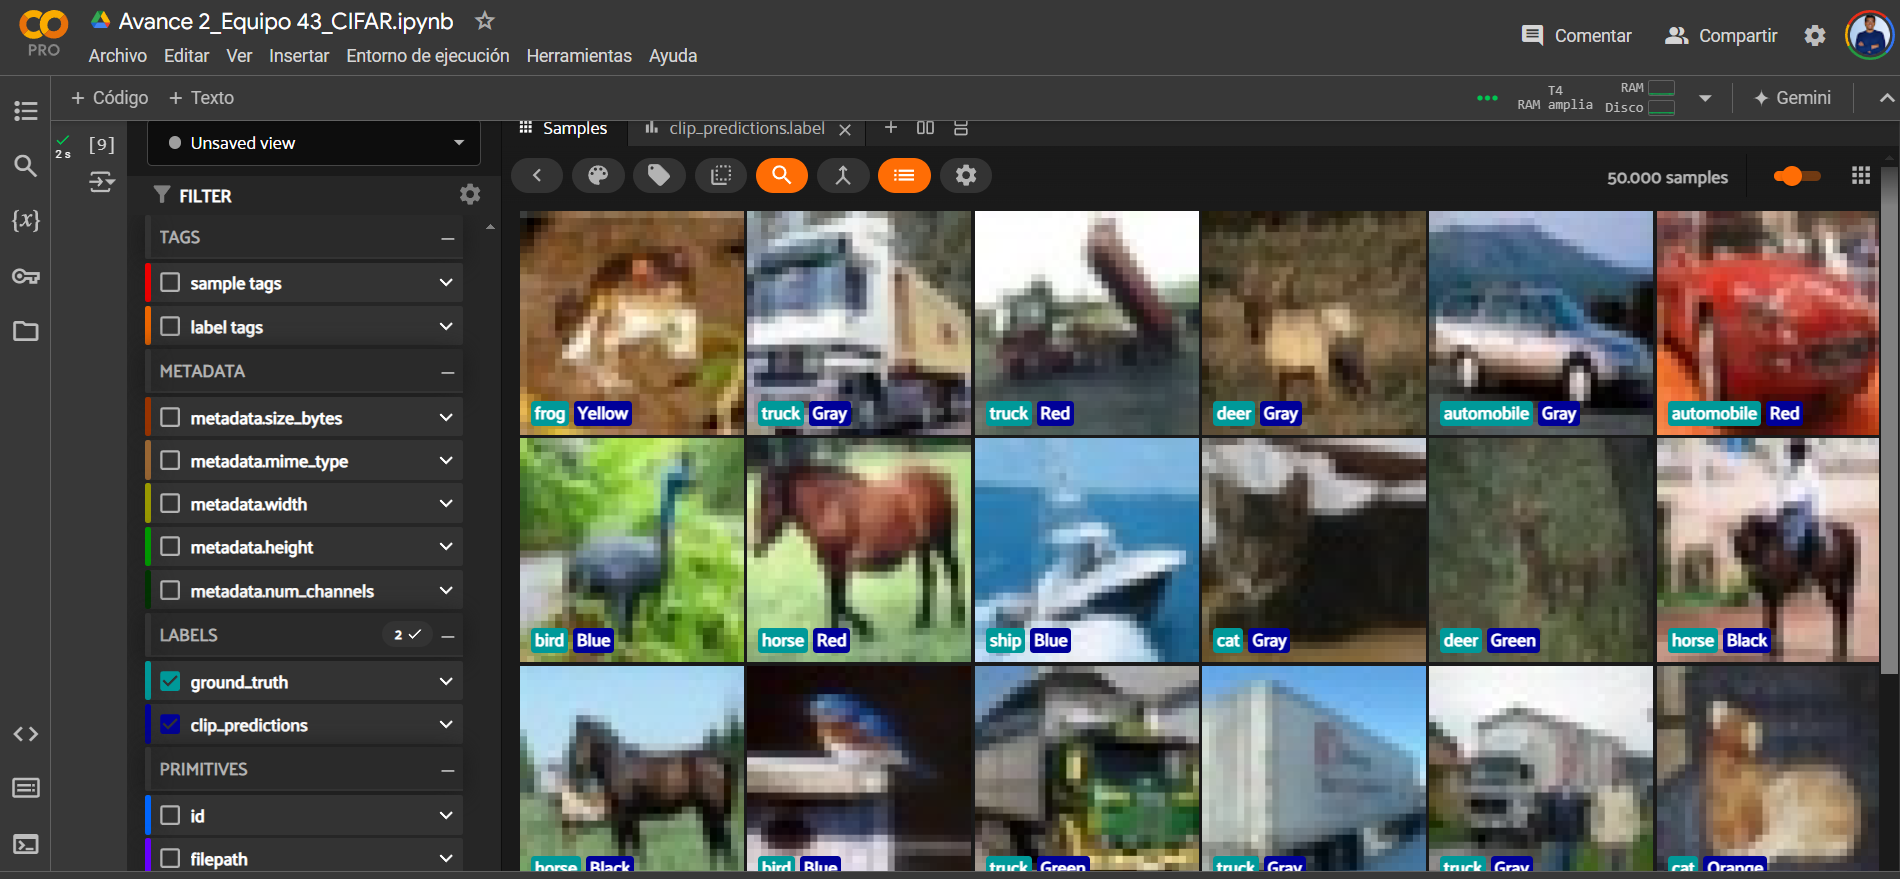

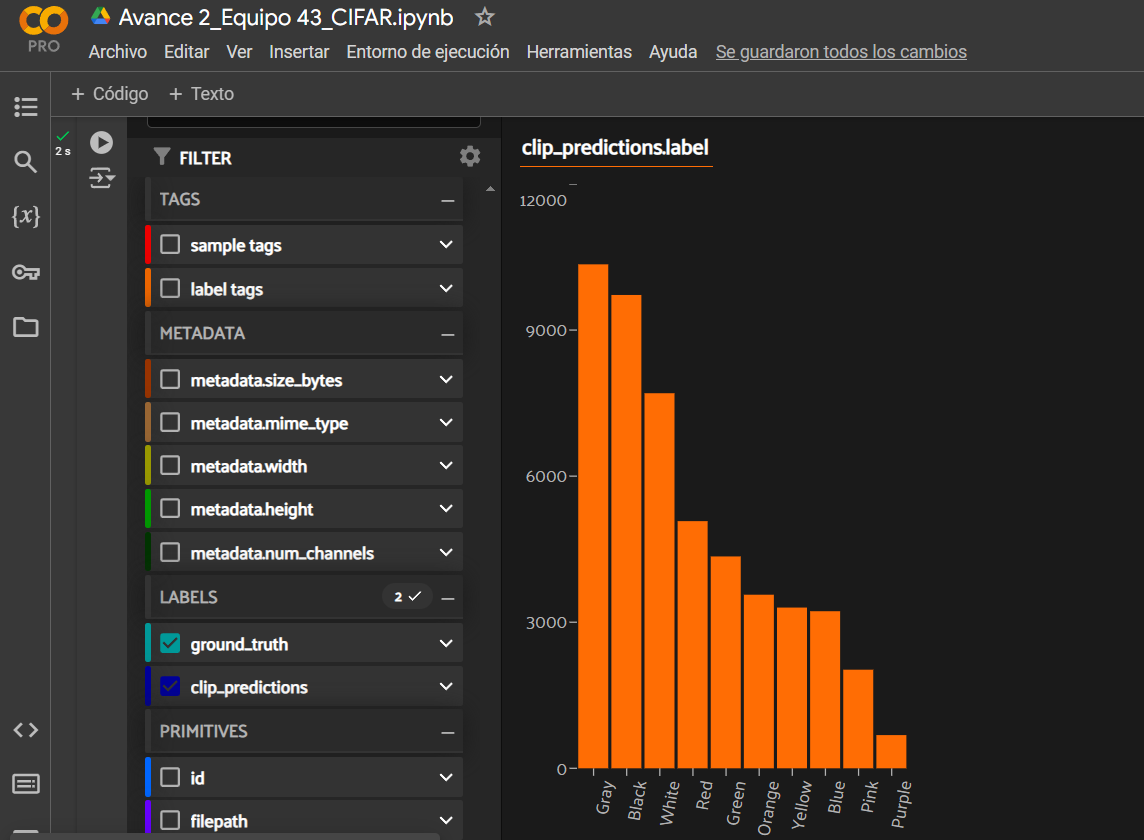

#3.2 - Exportando Dataset con Atributos de Color

In [15]:
# The Dataset or DatasetView containing the samples you wish to export
dataset_or_view = dataset_color_train

# The directory to which to write the exported dataset
export_dir = "/content/data/export_3"

# The name of the sample field containing the label that you wish to export
# Used when exporting labeled datasets (e.g., classification or detection)
label_field = "clip_predictions"

# The type of dataset to export
# Any subclass of `fiftyone.types.Dataset` is supported
dataset_type = fo.types.CVATImageDataset  # for example

# Export the dataset
dataset_or_view.export(
    export_dir=export_dir,
    dataset_type=dataset_type,
    label_field=label_field,
)

Directory '/content/data/export_3' already exists; export will be merged with existing files


Dataset exporter expects labels in <class 'fiftyone.core.labels.Classifications'> format, but found <class 'fiftyone.core.labels.Classification'>. Wrapping field 'clip_predictions' as single-label lists...


INFO:fiftyone.utils.data.exporters:Dataset exporter expects labels in <class 'fiftyone.core.labels.Classifications'> format, but found <class 'fiftyone.core.labels.Classification'>. Wrapping field 'clip_predictions' as single-label lists...


 100% |█████████████| 50000/50000 [51.9s elapsed, 0s remaining, 989.3 samples/s]      


INFO:eta.core.utils: 100% |█████████████| 50000/50000 [51.9s elapsed, 0s remaining, 989.3 samples/s]      


In [ ]:
#Download Dataset Folder

In [16]:
!pip install -q zipfile36

In [17]:
import shutil
from google.colab import files

In [20]:
# Define the path to your folder
folder_path = '/content/data/export_3'  # Replace with the actual path to your folder
output_filename = 'export_3.zip'

# Create a ZIP file of the folder
shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_path)

'/content/export_3.zip'

In [21]:
# Download the ZIP file
files.download(output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#4 - Conclusiones

1. Se desarrolló de manera efectiva un script para el procesamiento individual de cada isntancia de segmentación de un subconjunto de imágenes pre-etiquetadas y pre-segmentadas del dataset COCO 2017 aplicando k-means clustering sobre los pixeles de la máscara (segmentación) para determinar el color dominante.

2. Se observa que en objetos (personas y vehículos) en donde existen múltiples colores, predomina el color negro como mayor color dominante en el segmento analizado de 50 imágenes.

3. Se propone ajustar los parámetros del k-means clustering hacia los centros de los clusters con el objetivo de encontrar el color dominante de acuerdo a mayor representación dentro de la máscara.

#5 - Referencias

1. Smits, Thomas & Wevers, Melvin. (2021). The agency of computer vision models as optical instruments. Visual Communication. 21. 147035722199209. 10.1177/1470357221992097.

2. Top 10 Datasets for Computer Vision · Syntric AI. (2022). Retrieved from https://www.syntric.ai/post/unlocking-computer-vision-the-10-best-datasets

3. Common Objects in Context. (n.d.). Retrieved from https://cocodataset.org/#home

4. Meel, V. (2024). What is the COCO Dataset? What you need to know in 2024. Retrieved from https://viso.ai/computer-vision/coco-dataset/

5. Maitlo, N., Noonari, N., Ghanghro, S. A., Duraisamy, S., & Ahmed, F. (2024). Color Recognition in Challenging Lighting Environments: CNN Approach. ArXiv. /abs/2402.04762

6. De, K., & Pedersen, M. (2021). Impact of Colour on Robustness of Deep Neural Networks. 2021 IEEE/CVF International Conference on Computer Vision Workshops (ICCVW), 21–30. https://doi.org/10.1109/ICCVW54120.2021.00009

7. FiftyOne by Voxel 51. (n.d.). Retrieved from https://docs.voxel51.com/

8. COCO Dataset Integration in Fifty One. (n.d.). Retrieved from https://docs.voxel51.com/integrations/coco.html?highlight=coco

9. Hofesmann, E. (2022). The COCO Dataset: Best Practices for Downloading, Visualization, and Evaluation. Retrieved from https://medium.com/voxel51/the-coco-dataset-best-practices-for-downloading-visualization-and-evaluation-68a3d7e97fb7

10. Clustering Images with Embeddings. (n.d.). Retrieved from https://docs.voxel51.com/tutorials/clustering.html

11. Gallagher, J. (2024). Color and Product Type Inspection with Computer Vision. Retrieved from https://blog.roboflow.com/how-to-analyze-product-color/

12. Lin, T.-Y., Maire, M., Belongie, S., Bourdev, L., Girshick, R., Hays, J., … Dollár, P. (2015). Microsoft COCO: Common Objects in Context. Retrieved from https://arxiv.org/abs/1405.0312

13. Rachmadi, R. F., & Purnama, I. K. E. (2018). Vehicle Color Recognition using Convolutional Neural Network. Retrieved from https://arxiv.org/abs/1510.07391

14. Hofesmann, E. (2021). How to work with object detection datasets in COCO format. Retrieved from https://towardsdatascience.com/how-to-work-with-object-detection-datasets-in-coco-format-9bf4fb5848a4

15. Prepare COCO datasets¶. (n.d.). Retrieved from https://cv.gluon.ai/build/examples_datasets/mscoco.html

16. skimage.color#. (n.d.). Retrieved from https://scikit-image.org/docs/dev/api/skimage.color.html

17. Colors Tutorial. W3 Schools. (N.d.). Retrieved from https://www.w3schools.com/colors/colors_wheels.asp#:~:text=The%203%20primary%20colors%20are,Orange%2C%20Green%2C%20and%20Purple.&text=Blue%20and%20Red%20%3D%20Purple.